
# **Problem Statement**



# **Project Description**
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# **Loading Packages and Data**

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns #Understanding my variables
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('/content/Train.csv')
test_data=pd.read_csv('/content/Test.csv')

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# **Data Structure and Content**

In [5]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
data.shape

(8523, 12)

In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# **Exploratory Data Analysis**

In [8]:
data['Item_Weight'].fillna(data.Item_Weight.mean(),inplace=True)
test_data['Item_Weight'].fillna(test_data.Item_Weight.mean(),inplace=True)

In [9]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
data['Outlet_Size'].fillna(data.Outlet_Size.mode()[0],inplace=True)
test_data['Outlet_Size'].fillna(test_data.Outlet_Size.mode()[0],inplace=True)

In [12]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [14]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [15]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
data.nunique(axis=0)

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# **Univariate Analysis**

In [17]:
from pandas_profiling import ProfileReport

In [18]:
profile = ProfileReport(data, 'Pandas Profiling Report')

In [19]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Hypothesis Generation**

Items with low fat content sell better in cities, showing that people are more health concerned.

Items that are more visible have better sales but lower Item MRP.

Dairy products and fruits and vegetables should sell the best because they are in high demand.

Sales in larger-sized locations, such as Supermarkets 1 and 3, should be greater.

The older stores should have larger sales than the others.

Supermarkets must have better sales in urban areas owing to the more conveniently accessible characteristic.

In rural locations, grocery stores must have larger sales.

In [20]:
# Numeric columns

numeric_cols = data.select_dtypes(include=['int', 'float']).columns

In [21]:
numeric_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

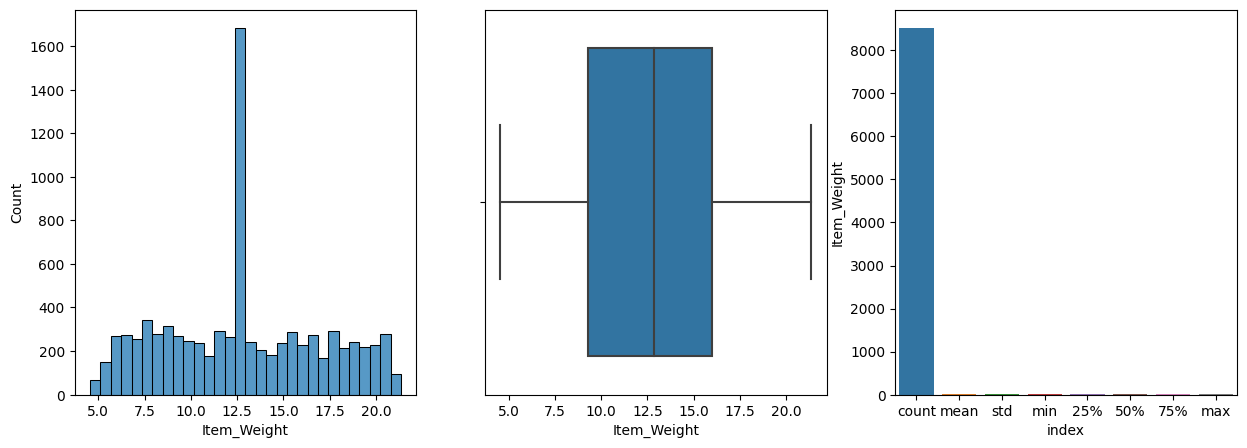

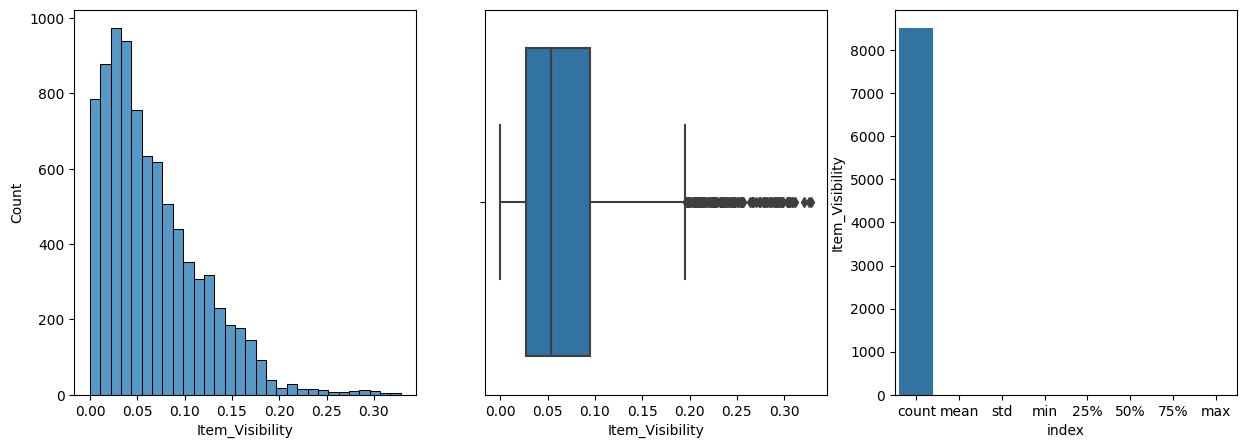

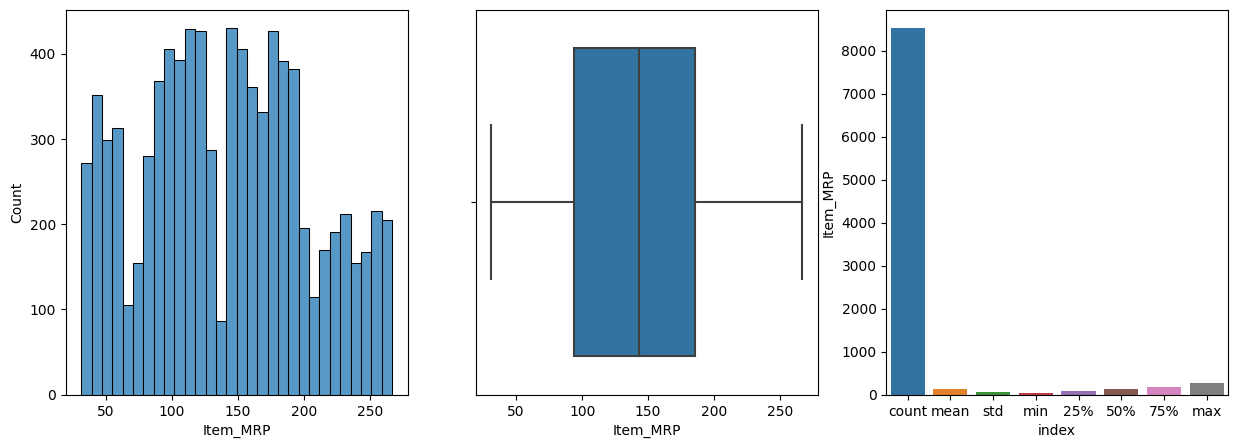

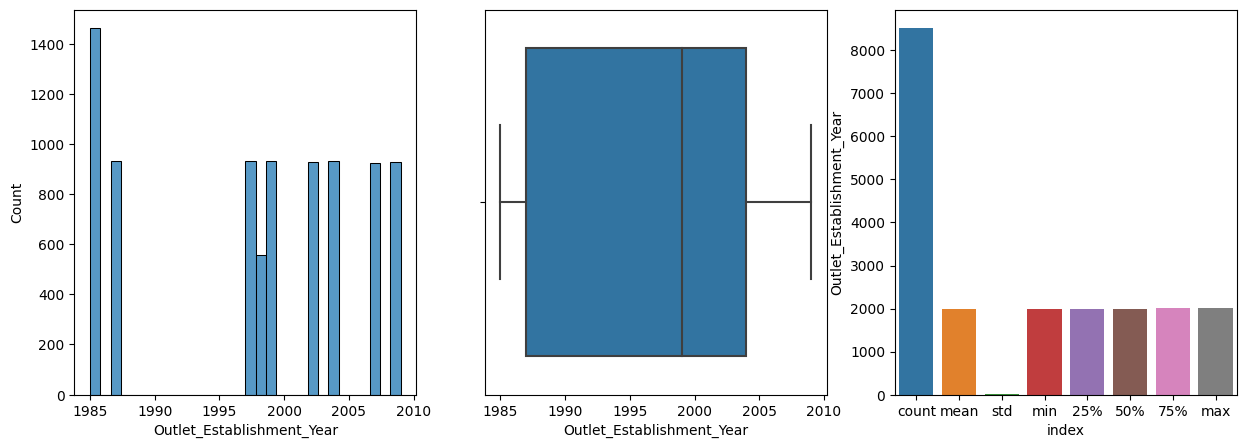

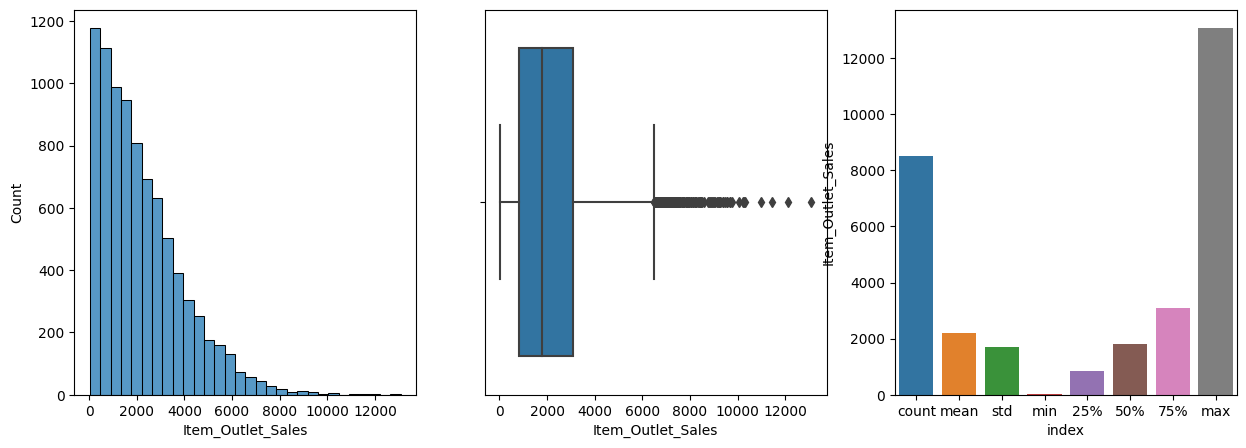

In [22]:
for col in numeric_cols:
    fig, axs = plt.subplots(1,3,figsize=(15,5))
    sns.histplot(data=data, x=col, bins=30, ax = axs[0])
    sns.boxplot(x=data[col], ax=axs[1])
    sns.barplot(data= data[col].describe().reset_index(), x='index', y=col, ax=axs[2])

In [23]:
#Outlier Removal
def find_boundry(df,variable):
    Q1 =df[variable].quantile(.25)
    Q3 =df[variable].quantile(.75)
    IQR = Q3 - Q1
    lower_boundry = Q1 - 1.5*IQR
    upper_boundry = Q3 + 1.5*IQR
    
    return lower_boundry ,upper_boundry
def treat_outliers(df,variable):
    lower_boundry ,upper_boundry = find_boundry(df,variable)
    df[variable] = np.where(df[variable] > upper_boundry, upper_boundry, df[variable])
    df[variable] = np.where(df[variable] < lower_boundry, lower_boundry, df[variable])

In [24]:
treat_outliers(data, 'Item_Visibility')
treat_outliers(data, 'Item_Outlet_Sales')

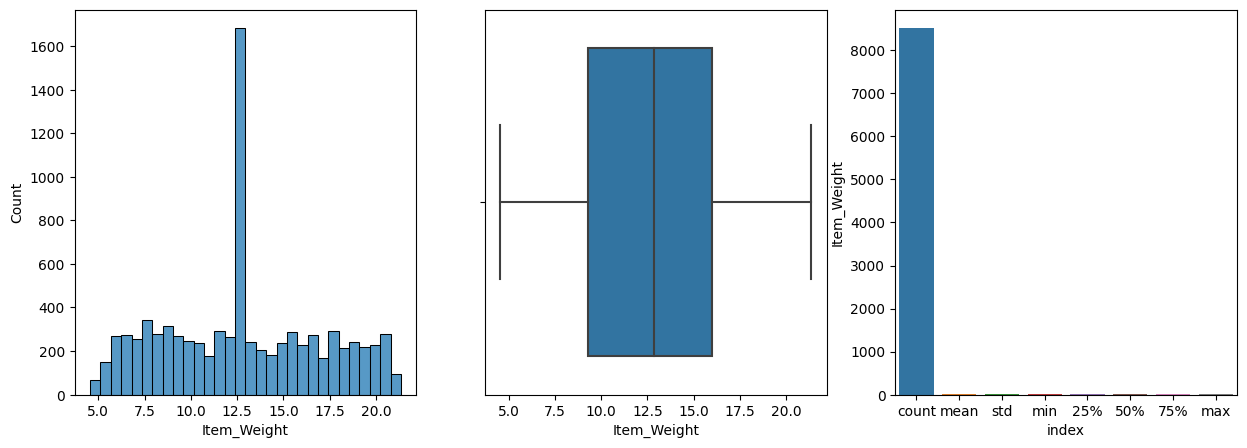

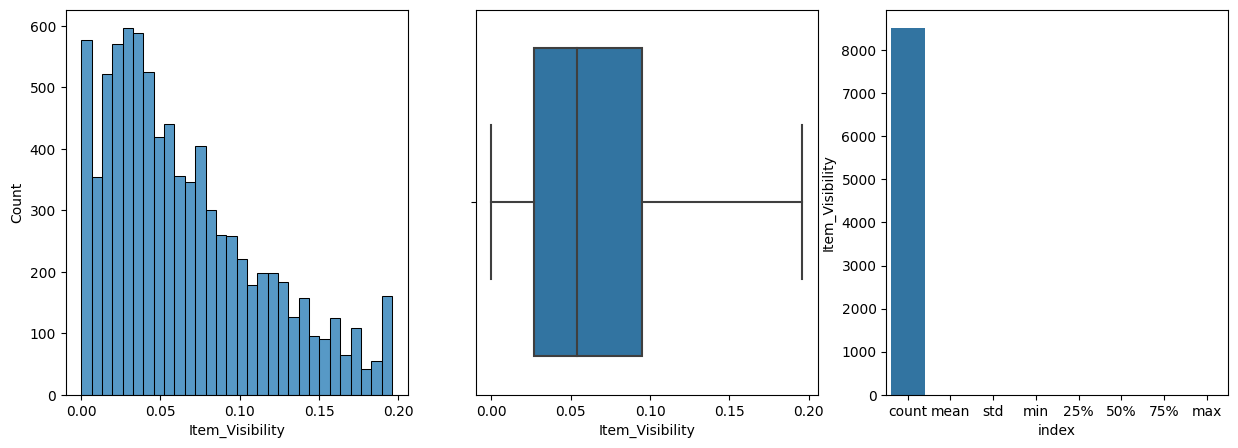

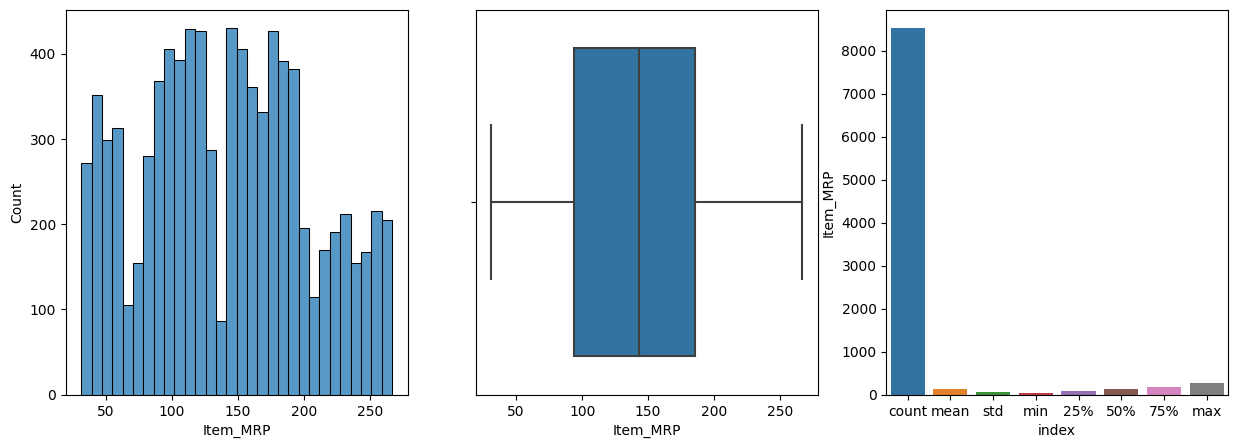

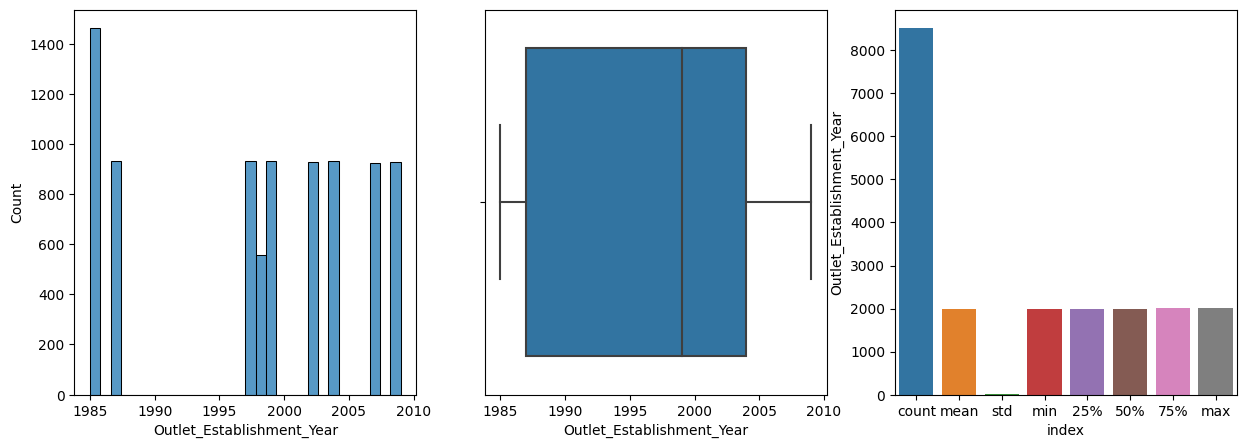

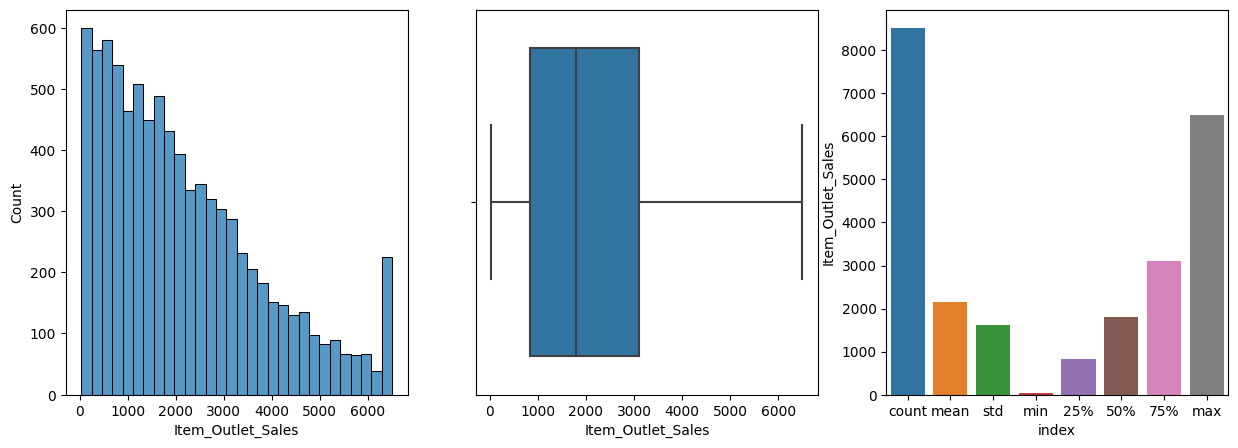

In [25]:
for col in numeric_cols:
    fig, axs = plt.subplots(1,3,figsize=(15,5))
    sns.histplot(data=data, x=col, bins=30, ax = axs[0])
    sns.boxplot(x=data[col], ax=axs[1])
    sns.barplot(data= data[col].describe().reset_index(), x='index', y=col, ax=axs[2])

# **Bivariate Analysis**

<Figure size 2000x2000 with 0 Axes>

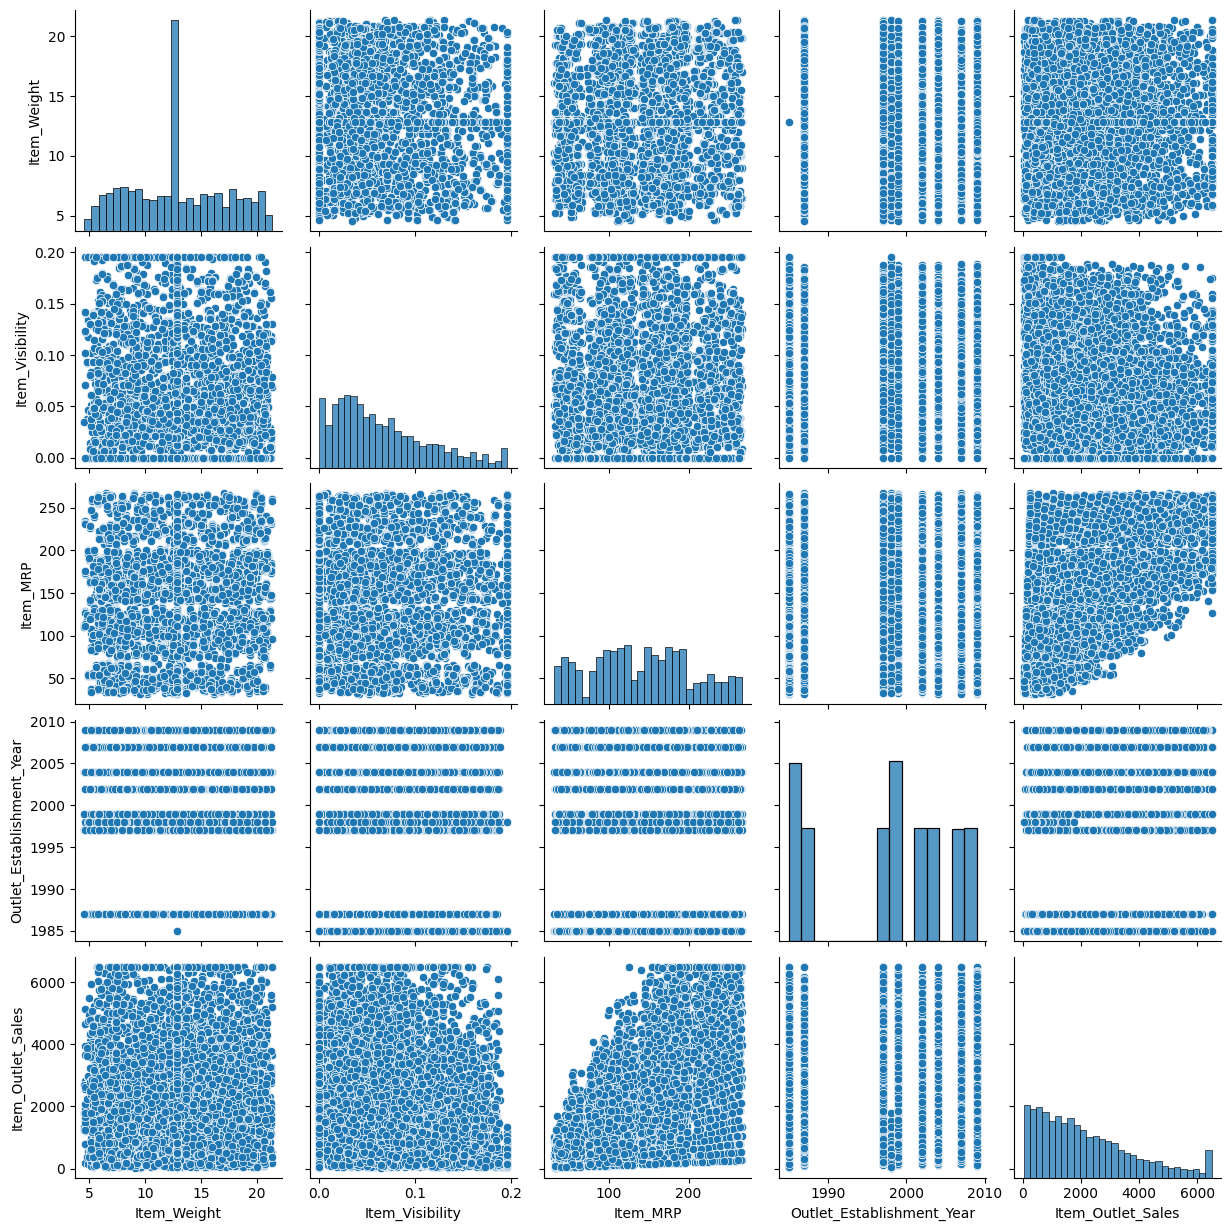

In [26]:
plt.figure(figsize=(20,20))
sns.pairplot(data)
plt.show()

<Axes: >

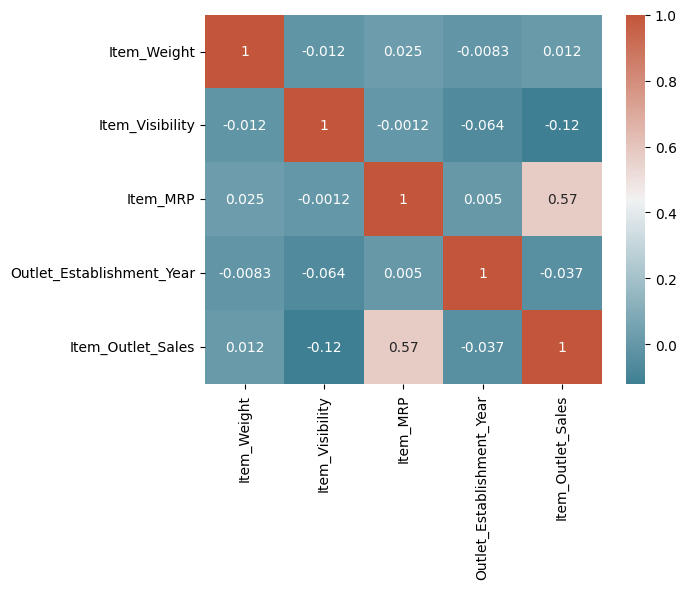

In [27]:
# calculate correlation matrix
corr = data.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [28]:
df = data.drop('Item_Identifier',axis=1)
test_data = test_data.drop('Item_Identifier',axis=1)

In [29]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# **Encoding Categorical Variables**

In [30]:
#categorical Columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [31]:
categorical_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [32]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first =True)

In [33]:
test_data = pd.get_dummies(test_data, columns=categorical_cols, drop_first =True)

In [34]:
df.shape

(8523, 40)

In [35]:
features = df.drop(['Item_Outlet_Sales'],axis=1)
target = df['Item_Outlet_Sales']

In [36]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


# **Modeling**

In [37]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=121)
print(train_x.shape, train_y.shape)

(6818, 39) (6818,)


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

**Linear Regression**

In [39]:
model = LinearRegression()

In [40]:
model.fit(train_x,train_y)

LinearRegression()

In [41]:
Y_pred_lr=model.predict(test_x)

In [42]:
print(r2_score(test_y,Y_pred_lr))
print(mean_absolute_error(test_y,Y_pred_lr))
print(np.sqrt(mean_squared_error(test_y,Y_pred_lr)))

0.565403750711417
791.4906604705486
1053.792815869753


**Lasso**

In [43]:
model1 = Lasso()

In [44]:
model1.fit(train_x,train_y)

Lasso()

In [45]:
Y_pred_ls=model1.predict(test_x)

In [46]:
print(r2_score(test_y,Y_pred_ls))
print(mean_absolute_error(test_y,Y_pred_ls))
print(np.sqrt(mean_squared_error(test_y,Y_pred_ls)))

0.5665070748003865
789.6640024938448
1052.4543162058196


**XGBoost**

In [47]:
import xgboost as xgb

In [48]:
# Create an XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=10, n_estimators=150)

In [49]:
# Fit the model to the training data
xgb_model.fit(train_x,train_y)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [50]:
# Make predictions on the testing data
y_pred_xgb = xgb_model.predict(test_x)

In [51]:
print(r2_score(test_y,y_pred_xgb))
print(mean_absolute_error(test_y,y_pred_xgb))
print(np.sqrt(mean_squared_error(test_y,y_pred_xgb)))

0.5924035246444301
732.6304169892531
1020.5339489085652


 **Random Forest**

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf = RandomForestRegressor(max_depth=10, random_state=0)

In [54]:
rf.fit(train_x,train_y)

RandomForestRegressor(max_depth=10, random_state=0)

In [55]:
Y_pred_rf= rf.predict(test_x)

In [56]:
print(r2_score(test_y,Y_pred_rf))
print(mean_absolute_error(test_y,Y_pred_rf))
print(np.sqrt(mean_squared_error(test_y,Y_pred_rf)))

0.5887757207299681
723.7663561923621
1025.0655085297672


# **------------------------------------------------------------------------**

In [57]:
# As XGBoost Gives max score we use it for test prediction

preds = xgb_model.predict(test_data)

In [58]:
test_data["Item_Outlet_Sales"] = preds

In [59]:
test_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,20.750000,0.007565,107.8622,1999,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,1577.751953
1,8.300000,0.038428,87.3198,2007,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,1236.315430
2,14.600000,0.099575,241.7538,1998,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,989.237549
3,7.315000,0.015388,155.0340,2007,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,2498.209229
4,12.695633,0.118599,234.2300,1985,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,4714.758301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,141.3154,1997,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,2334.792725
5677,7.600000,0.142991,169.1448,2009,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,2479.193359
5678,10.000000,0.073529,118.7440,2002,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1664.166748
5679,15.300000,0.000000,214.6218,2007,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,3828.987793


# **Conclusion**

- Sales of low-fat products are up virtually evenly in Tier-1 and Tier-3 cities, showing that diet concern is not just a problem in big cities.
- Better visibility does not necessarily mean better sales or cheaper MRPs; visibility is really spread fairly.
- No of the location, the most popular items sold in any outlet are snack foods, fruits, and vegetables.
- The older Medium-sized stores had stronger sales than the others.
- Despite the fact that supermarket Type-1 is larger in size and has more sales as a result, successful grocery shops may also operate at smaller sizes and still function effectively.
-The best sales performance is shown in supermarket Type-3, followed by grocery stores in rural locations.